In [1]:
# !pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [3]:
df = pd.read_csv('소방청_구조활동현황_20231231.csv', encoding='cp949')

In [4]:
display(df)

,번호,신고년월일,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별
0,1,2023-01-01,00:00,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량
1,2,2023-01-01,00:00,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량
2,3,2023-01-01,00:01,2023-01-01,00:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문
3,4,2023-01-01,00:03,2023-01-01,00:04,서울특별시,중구,충무로2가,화재,건축·구조물
4,5,2023-01-01,00:04,2023-01-01,00:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비
...,...,...,...,...,...,...,...,...,...,...
651132,651133,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인
651133,651134,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인
651134,651135,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사
651135,651136,2023-12-31,23:57,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)"


In [5]:
df['신고년월일'] = pd.to_datetime(df['신고년월일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   신고년월일         651137 non-null  datetime64[ns]
 2   신고시각          651137 non-null  object        
 3   출동년월일         651137 non-null  object        
 4   출동시각          651137 non-null  object        
 5   발생장소_시        651105 non-null  object        
 6   발생장소_구        651105 non-null  object        
 7   발생장소_동        647090 non-null  object        
 8   사고원인          651137 non-null  object        
 9   사고원인코드명_사고종별  651137 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 49.7+ MB


In [6]:
df['신고시각'] = pd.to_datetime(df['신고시각'], format='%H:%M')
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   신고년월일         651137 non-null  datetime64[ns]
 2   신고시각          651137 non-null  datetime64[ns]
 3   출동년월일         651137 non-null  object        
 4   출동시각          651137 non-null  object        
 5   발생장소_시        651105 non-null  object        
 6   발생장소_구        651105 non-null  object        
 7   발생장소_동        647090 non-null  object        
 8   사고원인          651137 non-null  object        
 9   사고원인코드명_사고종별  651137 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 49.7+ MB


In [7]:
# datetime은 시간과 분만 존재할 수 없다(신고시각 참고)
df

,번호,신고년월일,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별
0,1,2023-01-01,1900-01-01 00:00:00,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량
1,2,2023-01-01,1900-01-01 00:00:00,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량
2,3,2023-01-01,1900-01-01 00:01:00,2023-01-01,00:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문
3,4,2023-01-01,1900-01-01 00:03:00,2023-01-01,00:04,서울특별시,중구,충무로2가,화재,건축·구조물
4,5,2023-01-01,1900-01-01 00:04:00,2023-01-01,00:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비
...,...,...,...,...,...,...,...,...,...,...
651132,651133,2023-12-31,1900-01-01 23:55:00,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인
651133,651134,2023-12-31,1900-01-01 23:55:00,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인
651134,651135,2023-12-31,1900-01-01 23:55:00,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사
651135,651136,2023-12-31,1900-01-01 23:57:00,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)"


In [8]:
df['신고년월일'] = df['신고년월일'].astype(str)
df['신고시각'] = df['신고시각'].dt.strftime('%H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   번호            651137 non-null  int64 
 1   신고년월일         651137 non-null  object
 2   신고시각          651137 non-null  object
 3   출동년월일         651137 non-null  object
 4   출동시각          651137 non-null  object
 5   발생장소_시        651105 non-null  object
 6   발생장소_구        651105 non-null  object
 7   발생장소_동        647090 non-null  object
 8   사고원인          651137 non-null  object
 9   사고원인코드명_사고종별  651137 non-null  object
dtypes: int64(1), object(9)
memory usage: 49.7+ MB


In [9]:
df['신고일시'] = df['신고년월일'] +' ' + df['신고시각']
df

,번호,신고년월일,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시
0,1,2023-01-01,00:00,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00
1,2,2023-01-01,00:00,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00
2,3,2023-01-01,00:01,2023-01-01,00:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01
3,4,2023-01-01,00:03,2023-01-01,00:04,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03
4,5,2023-01-01,00:04,2023-01-01,00:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04
...,...,...,...,...,...,...,...,...,...,...,...
651132,651133,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55
651133,651134,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55
651134,651135,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55
651135,651136,2023-12-31,23:57,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   번호            651137 non-null  int64 
 1   신고년월일         651137 non-null  object
 2   신고시각          651137 non-null  object
 3   출동년월일         651137 non-null  object
 4   출동시각          651137 non-null  object
 5   발생장소_시        651105 non-null  object
 6   발생장소_구        651105 non-null  object
 7   발생장소_동        647090 non-null  object
 8   사고원인          651137 non-null  object
 9   사고원인코드명_사고종별  651137 non-null  object
 10  신고일시          651137 non-null  object
dtypes: int64(1), object(10)
memory usage: 54.6+ MB


In [11]:
df['신고일시'] = pd.to_datetime(df['신고일시'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   신고년월일         651137 non-null  object        
 2   신고시각          651137 non-null  object        
 3   출동년월일         651137 non-null  object        
 4   출동시각          651137 non-null  object        
 5   발생장소_시        651105 non-null  object        
 6   발생장소_구        651105 non-null  object        
 7   발생장소_동        647090 non-null  object        
 8   사고원인          651137 non-null  object        
 9   사고원인코드명_사고종별  651137 non-null  object        
 10  신고일시          651137 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 54.6+ MB


In [13]:
df['출동일시'] = df['출동년월일'] + ' ' + df['출동시각']
df['출동일시'] = pd.to_datetime(df['출동일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   신고년월일         651137 non-null  object        
 2   신고시각          651137 non-null  object        
 3   출동년월일         651137 non-null  object        
 4   출동시각          651137 non-null  object        
 5   발생장소_시        651105 non-null  object        
 6   발생장소_구        651105 non-null  object        
 7   발생장소_동        647090 non-null  object        
 8   사고원인          651137 non-null  object        
 9   사고원인코드명_사고종별  651137 non-null  object        
 10  신고일시          651137 non-null  datetime64[ns]
 11  출동일시          651137 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 59.6+ MB


In [14]:
# 컴럼 삭제 drop axis = 가로 : 0, 세로 : 1
# 원래 있는 데이터프레임에 바로 적용하지 않는다

df_new = df.drop(['신고년월일'], axis=1)
df_new

,번호,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,00:00,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,00:00,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,00:01,2023-01-01,00:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,00:03,2023-01-01,00:04,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,00:04,2023-01-01,00:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...
651132,651133,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,23:57,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


In [15]:
# inplace=True : 바로 적용
df_new.drop(['신고시각'], axis=1, inplace=True)

In [16]:
df_new

,번호,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,2023-01-01,00:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,2023-01-01,00:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,2023-01-01,00:04,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,2023-01-01,00:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...,...,...
651132,651133,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


In [17]:
df_new.drop(['출동년월일'], axis=1, inplace=True)
df_new.drop(['출동시각'], axis=1, inplace=True)
df_new.head(3)

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   발생장소_시        651105 non-null  object        
 2   발생장소_구        651105 non-null  object        
 3   발생장소_동        647090 non-null  object        
 4   사고원인          651137 non-null  object        
 5   사고원인코드명_사고종별  651137 non-null  object        
 6   신고일시          651137 non-null  datetime64[ns]
 7   출동일시          651137 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 39.7+ MB


In [19]:
# 결측치(NULL) 확인
# 데이터에서 빠진 값 없는지 확인
df.isnull().sum()


번호                 0
신고년월일              0
신고시각               0
출동년월일              0
출동시각               0
발생장소_시            32
발생장소_구            32
발생장소_동          4047
사고원인               0
사고원인코드명_사고종별       0
신고일시               0
출동일시               0
dtype: int64

In [20]:
# 발생장소_구의 null값인 데이터 출력
df_new[df_new['발생장소_구'].isnull()]

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
1369,1370,NaN,NaN,NaN,장애물 제거 및 안전조치,간판 안전조치,2023-01-01 21:31:00,2023-01-01 21:35:00
2287,2288,NaN,NaN,NaN,비화재보 확인,타는연기,2023-01-02 15:37:00,2023-01-02 15:38:00
100792,100793,NaN,NaN,NaN,위치확인,신변확인(현장확인),2023-03-17 04:56:00,2023-03-17 04:57:00
116699,116700,NaN,NaN,NaN,화재,화재확인,2023-03-28 23:49:00,2023-03-28 23:50:00
234146,234147,NaN,NaN,NaN,비화재보 확인,비상방송설비,2023-06-15 17:01:00,2023-06-15 17:01:00
282248,282249,NaN,NaN,NaN,벌(집)제거,말벌,2023-07-10 12:01:00,2023-07-10 12:03:00
312896,312897,NaN,NaN,NaN,비화재보 확인,타는연기,2023-07-21 07:12:00,2023-07-21 07:15:00
346846,346847,NaN,NaN,NaN,벌(집)제거,말벌,2023-07-31 09:02:00,2023-07-31 09:04:00
369806,369807,NaN,NaN,NaN,비화재보 확인,기타,2023-08-06 16:48:00,2023-08-06 16:50:00
409559,409560,NaN,NaN,NaN,벌(집)제거,말벌,2023-08-18 11:23:00,2023-08-18 11:24:00


In [21]:
# 발생장소_동 이 나성동인 데이터 출력
df_new[df_new['발생장소_동']=='나성동']

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
3109,3110,세종특별자치시,세종특별자치시,나성동,장애물 제거 및 안전조치,낙하물 안전조치,2023-01-03 08:31:00,2023-01-03 08:33:00
3548,3549,세종특별자치시,세종특별자치시,나성동,교통,차 대 차,2023-01-03 14:05:00,2023-01-03 14:07:00
3681,3682,세종특별자치시,세종특별자치시,나성동,비화재보 확인,자동화재속보설비,2023-01-03 16:02:00,2023-01-03 16:03:00
5433,5434,세종특별자치시,세종특별자치시,나성동,교통,오토바이,2023-01-04 23:46:00,2023-01-04 23:48:00
6043,6044,세종특별자치시,세종특별자치시,나성동,비화재보 확인,자동화재속보설비,2023-01-05 13:30:00,2023-01-05 13:31:00
...,...,...,...,...,...,...,...,...
642884,642885,세종특별자치시,세종특별자치시,나성동,비화재보 확인,자동화재속보설비,2023-12-25 23:52:00,2023-12-25 23:52:00
643146,643147,세종특별자치시,세종특별자치시,나성동,비화재보 확인,자동화재속보설비,2023-12-26 07:21:00,2023-12-26 07:21:00
646425,646426,세종특별자치시,세종특별자치시,나성동,교통,차 대 차,2023-12-28 11:47:00,2023-12-28 11:47:00
646803,646804,세종특별자치시,세종특별자치시,나성동,위치확인,실종신고,2023-12-28 17:40:00,2023-12-28 17:43:00


In [22]:
# 결측치 처리 방법
# 1. 0으로 처리
# 2. 아예 삭제
# 3. ''으로 만들기

# 결측치의 값을 다른 값으로 대체 : 결측치 대체, fillna
df_new['발생장소_구'].fillna('세종특별자치시', inplace=True)

In [23]:
df_new['발생장소_시'].fillna('', inplace=True)
df_new['발생장소_동'].fillna(0, inplace=True)
df_new.isnull().sum()

번호              0
발생장소_시          0
발생장소_구          0
발생장소_동          0
사고원인            0
사고원인코드명_사고종별    0
신고일시            0
출동일시            0
dtype: int64

In [24]:
df_new['발생장소_구'].value_counts()

발생장소_구
서구         12921
화성시        12415
평택시        11809
북구         10216
중구          9674
           ...  
울산광역시          3
광주광역시          2
전북특별자치도        2
대전광역시          1
제주특별자치도        1
Name: count, Length: 242, dtype: int64

In [25]:
td_drop = (df_new['발생장소_구']=='경기도') | (df_new['발생장소_구']=='경상남도')
df_new[~td_drop]

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


In [26]:
df_new

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


In [27]:
df_new[df_new['발생장소_구']=='북구']

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
159,160,광주광역시,북구,각화동,장애물 제거 및 안전조치,기타 안전조치,2023-01-01 03:21:00,2023-01-01 03:22:00
209,210,울산광역시,북구,천곡동,잠금장치개방,출입문,2023-01-01 05:02:00,2023-01-01 05:03:00
404,405,광주광역시,북구,두암동,장애물 제거 및 안전조치,고드름 제거,2023-01-01 08:55:00,2023-01-01 08:56:00
516,517,광주광역시,북구,금곡동,산악,실족,2023-01-01 10:29:00,2023-01-01 10:31:00
629,630,대구광역시,북구,복현동,승강기,승객용,2023-01-01 11:56:00,2023-01-01 11:57:00
...,...,...,...,...,...,...,...,...
650683,650684,부산광역시,북구,만덕동,산악,실족,2023-12-31 16:12:00,2023-12-31 16:13:00
650687,650688,대구광역시,북구,연경동,동물처리,포유류,2023-12-31 16:16:00,2023-12-31 16:17:00
650731,650732,대구광역시,북구,서변동,화재,화재확인,2023-12-31 16:57:00,2023-12-31 16:58:00
650759,650760,대구광역시,북구,산격동,위치확인,신변확인(현장확인),2023-12-31 17:31:00,2023-12-31 17:31:00


In [28]:
# 그룹화
df_new.groupby('발생장소_구')['번호'].count()

발생장소_구
가평군     2856
강남구     8039
강동구     4059
강릉시     4897
강북구     4459
       ...  
홍천군     3143
화성시    12415
화순군     1214
화천군     1216
횡성군     2867
Name: 번호, Length: 242, dtype: int64

In [29]:
# 이중 그룹화
double_grouped = df_new.groupby(['발생장소_시', '발생장소_구'])['번호'].count()
double_grouped

발생장소_시   발생장소_구 
         세종특별자치시      32
강원특별자치도  강릉시        4897
         강원특별자치도       8
         고성군        1540
         동해시        2144
                    ... 
충청북도     청주시 서원구    1807
         청주시 청원구    2058
         청주시 흥덕구    2653
         충주시        2690
         충청북도          5
Name: 번호, Length: 267, dtype: int64

In [30]:
df_double = pd.DataFrame(double_grouped)
df_double

번호
발생장소_시  발생장소_구       
        세종특별자치시    32
강원특별자치도 강릉시      4897
        강원특별자치도     8
        고성군      1540
        동해시      2144
...               ...
충청북도    청주시 서원구  1807
        청주시 청원구  2058
        청주시 흥덕구  2653
        충주시      2690
        충청북도        5

[267 rows x 1 columns]

In [31]:
# index
# reset_index() : 인덱스를 열로 변환
df_double_reset = df_double.reset_index()
df_double_reset


,발생장소_시,발생장소_구,번호
0,,세종특별자치시,32
1,강원특별자치도,강릉시,4897
2,강원특별자치도,강원특별자치도,8
3,강원특별자치도,고성군,1540
4,강원특별자치도,동해시,2144
...,...,...,...
262,충청북도,청주시 서원구,1807
263,충청북도,청주시 청원구,2058
264,충청북도,청주시 흥덕구,2653
265,충청북도,충주시,2690


In [32]:
# rename
df_double_reset = df_double_reset.rename(columns={'번호':'사고발생건수'})
df_double_reset

,발생장소_시,발생장소_구,사고발생건수
0,,세종특별자치시,32
1,강원특별자치도,강릉시,4897
2,강원특별자치도,강원특별자치도,8
3,강원특별자치도,고성군,1540
4,강원특별자치도,동해시,2144
...,...,...,...
262,충청북도,청주시 서원구,1807
263,충청북도,청주시 청원구,2058
264,충청북도,청주시 흥덕구,2653
265,충청북도,충주시,2690


In [33]:
# pivot_table()
# : 데이터프레임을 재구성해서 테이블 형태의 데이터로 만들어줌
df_double_pivot = df_new.pivot_table(index=['발생장소_시', '발생장소_구'], aggfunc='size').reset_index(name='사고발생건수')
df_double_pivot

,발생장소_시,발생장소_구,사고발생건수
0,,세종특별자치시,32
1,강원특별자치도,강릉시,4897
2,강원특별자치도,강원특별자치도,8
3,강원특별자치도,고성군,1540
4,강원특별자치도,동해시,2144
...,...,...,...
262,충청북도,청주시 서원구,1807
263,충청북도,청주시 청원구,2058
264,충청북도,청주시 흥덕구,2653
265,충청북도,충주시,2690


# 데이터 시각화
matplotlib : 기본. 다양한 종류의 그림 그릴수 있다  
  
seaborn : 심화. 간단하며 직관적이다. 틍계적 시각화에 특화되어 있다

In [34]:
# pip install matplotlib seaborn

<AxesSubplot:xlabel='발생장소_시', ylabel='사고발생건수'>

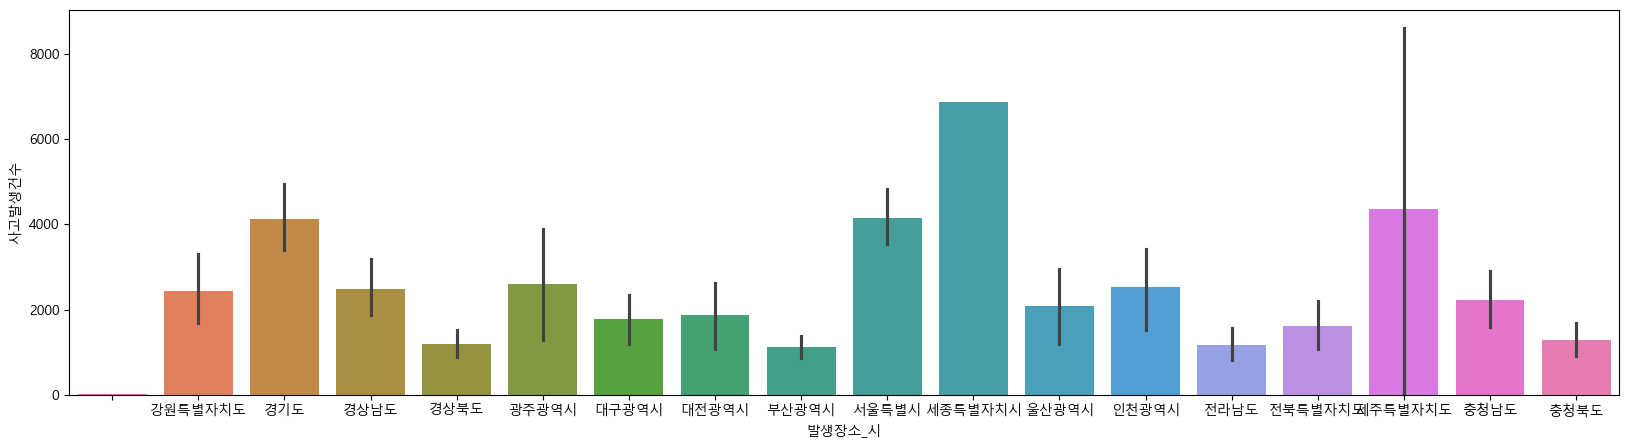

In [35]:
# 막대 그래프
plt.figure(figsize=(20, 5))

sns.barplot(data=df_double_pivot, x='발생장소_시', y='사고발생건수', hue='발생장소_시')

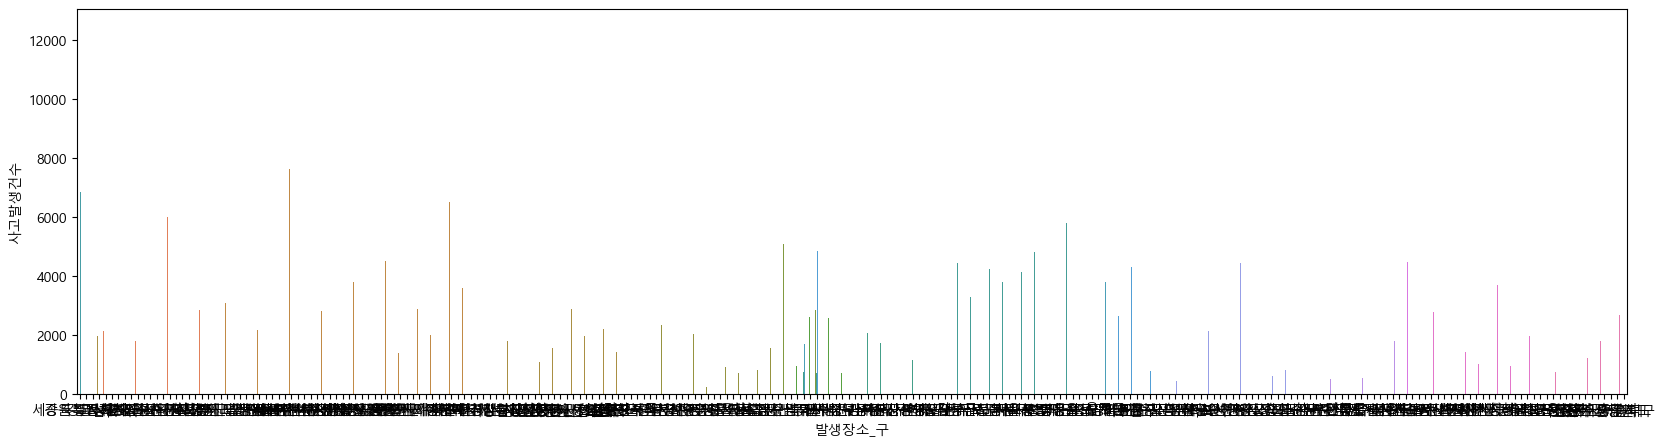

In [36]:
plt.figure(figsize=(20, 5))

ax = sns.barplot(data=df_double_pivot, x='발생장소_구', y='사고발생건수', hue='발생장소_시')
ax.legend(fontsize='xx-small')
ax.legend_.remove()

In [37]:
df_seoul = df_new[df_new['발생장소_시']=='서울특별시']
df_seoul

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
6,7,서울특별시,강서구,등촌동,기타 사고,기타,2023-01-01 00:05:00,2023-01-01 00:06:00
8,9,서울특별시,마포구,망원동,교통,차 대 차,2023-01-01 00:09:00,2023-01-01 00:10:00
18,19,서울특별시,송파구,마천동,잠금장치개방,기타 잠금장치 개방,2023-01-01 00:19:00,2023-01-01 00:21:00
25,26,서울특별시,강남구,삼성동,승강기,승객용,2023-01-01 00:28:00,2023-01-01 00:29:00
...,...,...,...,...,...,...,...,...
651125,651126,서울특별시,성북구,성북동,화재,건축·구조물,2023-12-31 23:48:00,2023-12-31 23:48:00
651126,651127,서울특별시,성북구,성북동,화재,화재확인,2023-12-31 23:48:00,2023-12-31 23:48:00
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00


In [38]:
df_seoul_pivot = df_seoul.pivot_table(index=['발생장소_구'], aggfunc='size').reset_index(name='사고발생건수')
df_seoul_pivot

,발생장소_구,사고발생건수
0,강남구,8039
1,강동구,4059
2,강북구,4459
3,강서구,6132
4,관악구,4412
5,광진구,3291
6,구로구,3992
7,금천구,3490
8,노원구,4242
9,도봉구,3878


In [39]:
df_seoul = df_seoul[df_seoul['발생장소_구'] != df_seoul['발생장소_시']]
df_seoul

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
6,7,서울특별시,강서구,등촌동,기타 사고,기타,2023-01-01 00:05:00,2023-01-01 00:06:00
8,9,서울특별시,마포구,망원동,교통,차 대 차,2023-01-01 00:09:00,2023-01-01 00:10:00
18,19,서울특별시,송파구,마천동,잠금장치개방,기타 잠금장치 개방,2023-01-01 00:19:00,2023-01-01 00:21:00
25,26,서울특별시,강남구,삼성동,승강기,승객용,2023-01-01 00:28:00,2023-01-01 00:29:00
...,...,...,...,...,...,...,...,...
651125,651126,서울특별시,성북구,성북동,화재,건축·구조물,2023-12-31 23:48:00,2023-12-31 23:48:00
651126,651127,서울특별시,성북구,성북동,화재,화재확인,2023-12-31 23:48:00,2023-12-31 23:48:00
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00


In [40]:
df_seoul_pivot = df_seoul.pivot_table(index=['발생장소_구'], aggfunc='size').reset_index(name='사고발생건수')
df_seoul_pivot

,발생장소_구,사고발생건수
0,강남구,8039
1,강동구,4059
2,강북구,4459
3,강서구,6132
4,관악구,4412
5,광진구,3291
6,구로구,3992
7,금천구,3490
8,노원구,4242
9,도봉구,3878


<AxesSubplot:xlabel='발생장소_구', ylabel='사고발생건수'>

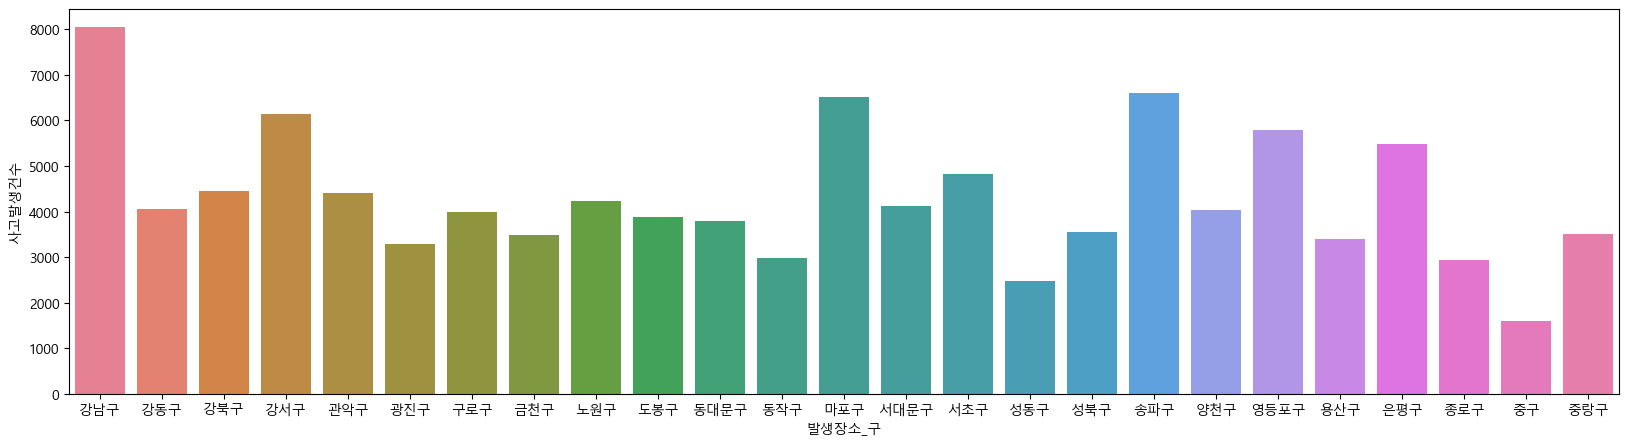

In [41]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_seoul_pivot, x='발생장소_구', y='사고발생건수', hue='발생장소_구')

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

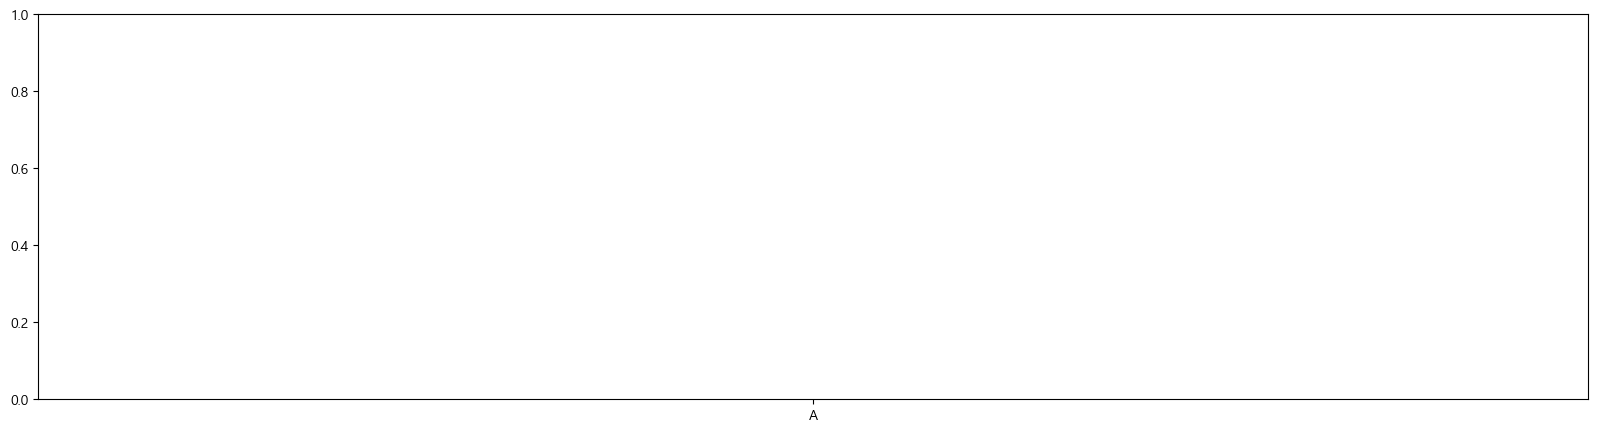

In [94]:
# lineplot이 안되는것 같다
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_seoul_pivot, x='발생장소_구', y='사고발생건수')

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

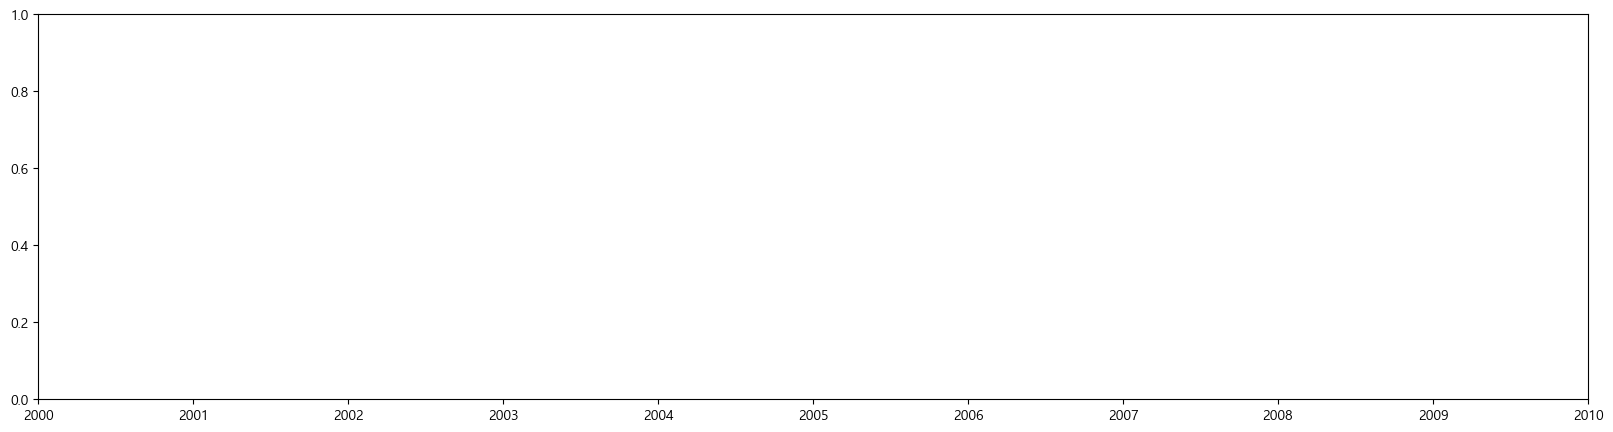

In [46]:
df_date_pivot = df_seoul.pivot_table(index=['신고일시', '발생장소_구'], aggfunc='size').reset_index(name='사고발생건수')
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_date_pivot, x=pd.to_datetime(df_seoul['신고일시']).dt.date, y='사고발생건수', hue='발생장소_구')

구별 평균 출동소요시간

In [66]:
df_seoul['출동소요시간'] = df_seoul['출동일시'] - df_seoul['신고일시']
# df_seoul

C:\Users\Owner\AppData\Local\Temp\ipykernel_5672\2400955831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['출동소요시간'] = df_seoul['출동일시'] - df_seoul['신고일시']


In [64]:
# 출동소요시간_초
df_seoul['출동소요시간_초'] = df_seoul['출동소요시간'].dt.total_seconds().astype(int)
# df_seoul

C:\Users\Owner\AppData\Local\Temp\ipykernel_5672\1998444656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['출동소요시간_초'] = df_seoul['출동소요시간'].dt.total_seconds().astype(int)


In [63]:
# 출동소요시간_분
df_seoul['출동소요시간_분'] = df_seoul['출동소요시간'].dt.total_seconds().astype(int) / 60
# df_seoul

C:\Users\Owner\AppData\Local\Temp\ipykernel_5672\2327897183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['출동소요시간_분'] = df_seoul['출동소요시간'].dt.total_seconds().astype(int) / 60


In [62]:
# unique().tolist() : 특정 컬럼의 고유한 값 확인
# df_seoul['출동소요시간_분'].unique().tolist()
df_seoul['출동소요시간_분'] = df_seoul['출동소요시간_분'].astype(int)


C:\Users\Owner\AppData\Local\Temp\ipykernel_5672\1569864618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['출동소요시간_분'] = df_seoul['출동소요시간_분'].astype(int)


In [59]:
# describe() : 통계적 요약
# (문자일땐 안되고 데이터 타입이 날짜나 숫자일때만 가능)
pd.set_option('display.float_format', '{:.2f}'.format)
df_seoul.describe(include='number')

,번호,출동소요시간,출동소요시간_초,출동소요시간_분
count,107656.00,107656,107656.00,107656.00
mean,312859.27,0 days 00:01:25.369696068,85.37,1.42
std,199595.78,0 days 01:46:57.893017808,6417.89,106.96
min,4.00,-24 days +00:04:00,-2073360.00,-34556.00
25%,136022.75,0 days 00:01:00,60.00,1.00
50%,286126.50,0 days 00:01:00,60.00,1.00
75%,501565.25,0 days 00:02:00,120.00,2.00
max,651135.00,1 days 00:02:00,86520.00,1442.00


In [61]:
df_seoul[df_seoul['신고일시']>df_seoul['출동일시']].sort_values(['출동소요시간'], ascending=True)  # ascending=True: 오름차순

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시,출동소요시간,출동소요시간_초,출동소요시간_분
119774,119775,서울특별시,광진구,능동,교통,차 대 차,2023-03-31 10:03:00,2023-03-07 10:07:00,-24 days +00:04:00,-2073360,-34556
598555,598556,서울특별시,성북구,석관동,위치확인,신변확인(현장확인),2023-11-22 00:30:00,2023-11-18 14:04:00,-4 days +13:34:00,-296760,-4946
580232,580233,서울특별시,종로구,명륜2가,인명 갇힘,건물,2023-11-08 00:08:00,2023-11-06 01:57:00,-2 days +01:49:00,-166260,-2771
548813,548814,서울특별시,강남구,삼성동,기타 사고,기타,2023-10-18 18:11:00,2023-10-18 11:20:00,-1 days +17:09:00,-24660,-411
600641,600642,서울특별시,성북구,하월곡동,기타 생활안전활동,기타 생활안전활동,2023-11-23 17:49:00,2023-11-23 14:12:00,-1 days +20:23:00,-13020,-217
129757,129758,서울특별시,송파구,방이동,화재,건축·구조물,2023-04-06 12:38:00,2023-04-06 10:00:00,-1 days +21:22:00,-9480,-158
79344,79345,서울특별시,성동구,성수동1가,위치확인,신변확인(현장확인),2023-03-01 10:48:00,2023-03-01 09:20:00,-1 days +22:32:00,-5280,-88
158677,158678,서울특별시,영등포구,여의도동,자살추정,투신,2023-04-27 18:42:00,2023-04-27 17:30:00,-1 days +22:48:00,-4320,-72
530874,530875,서울특별시,은평구,진관동,산악,실족,2023-10-07 15:54:00,2023-10-07 14:54:00,-1 days +23:00:00,-3600,-60
236164,236165,서울특별시,영등포구,영등포동7가,자살추정,자해,2023-06-16 21:58:00,2023-06-16 20:59:00,-1 days +23:01:00,-3540,-59


<AxesSubplot:xlabel='발생장소_구', ylabel='출동소요시간_분'>

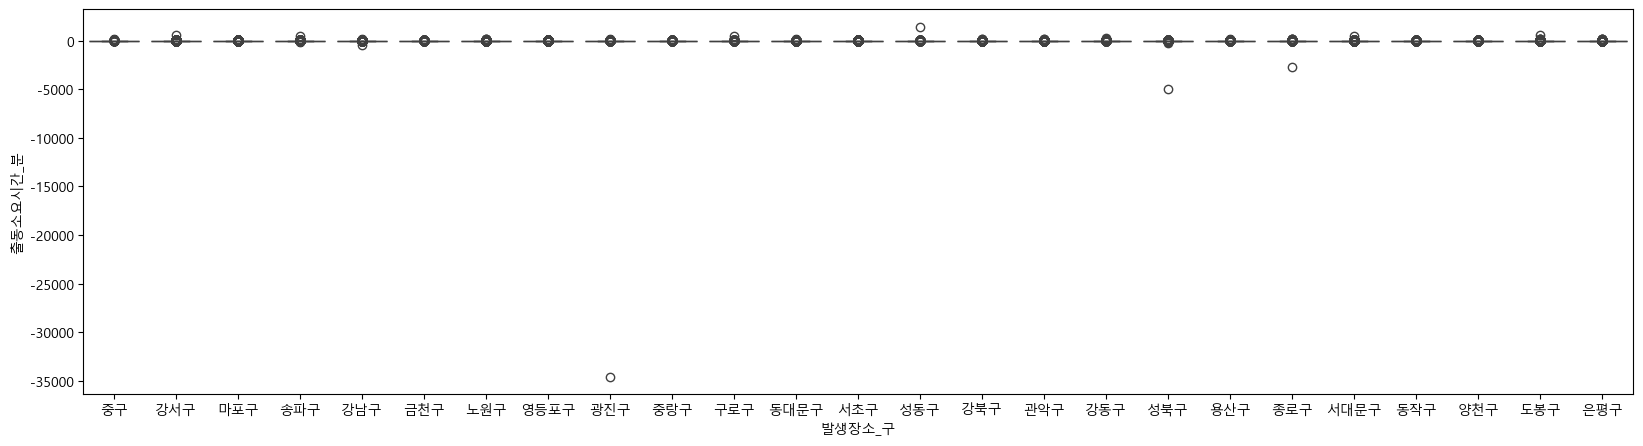

In [68]:
# boxplot
# 데이터의 분포, 이상치를 시각화하는 방법
plt.rcParams['axes.unicode_minus'] = False  # -일때도 표기할것
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_seoul, x='발생장소_구', y='출동소요시간_분', hue='발생장소_구')


<AxesSubplot:xlabel='발생장소_구', ylabel='출동소요시간_분'>

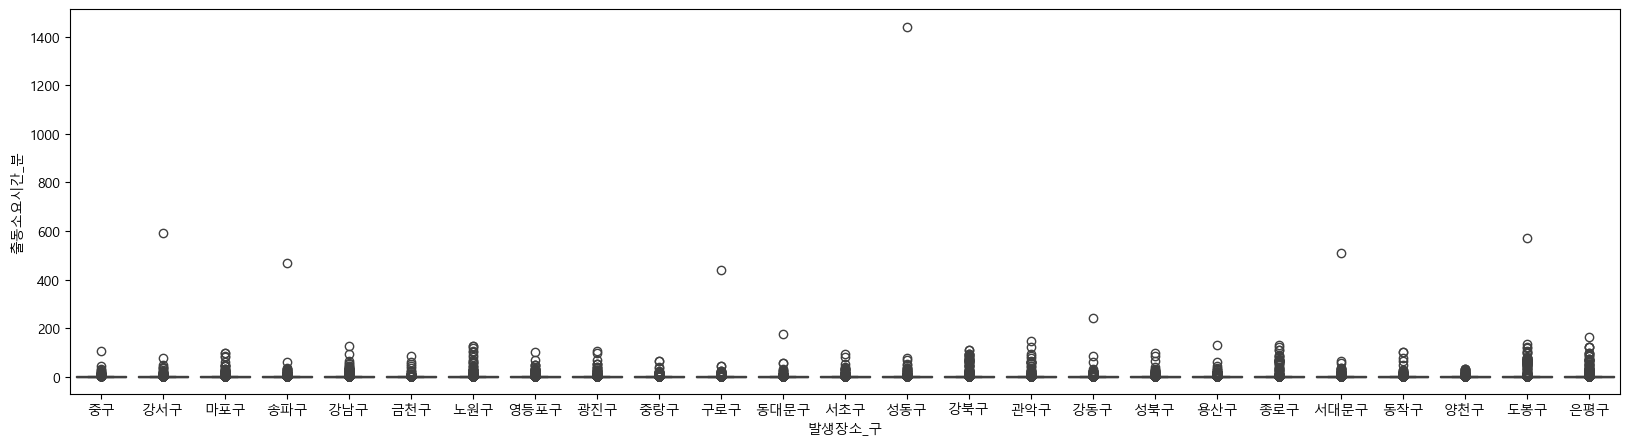

In [69]:
df_seoul = df_seoul[df_seoul['신고일시']<df_seoul['출동일시']]
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_seoul, x='발생장소_구', y='출동소요시간_분', hue='발생장소_구')


In [70]:
df_seoul['출동소요시간_분'].describe()

count   96813.00
mean        2.03
std         7.20
min         1.00
25%         1.00
50%         1.00
75%         2.00
max      1442.00
Name: 출동소요시간_분, dtype: float64

In [74]:
# 평균 +- 표준편차 * 3
mean = df_seoul['출동소요시간_분'].mean()
std = df_seoul['출동소요시간_분'].std()
threshold = mean + 3 * std  # 평균에서 표준편차의 3배 수준 이상이면 이상치로 판단

df_cleand = df_seoul[df_seoul['출동소요시간_분']<=threshold]
# df_cleand

<AxesSubplot:xlabel='발생장소_구', ylabel='출동소요시간_분'>

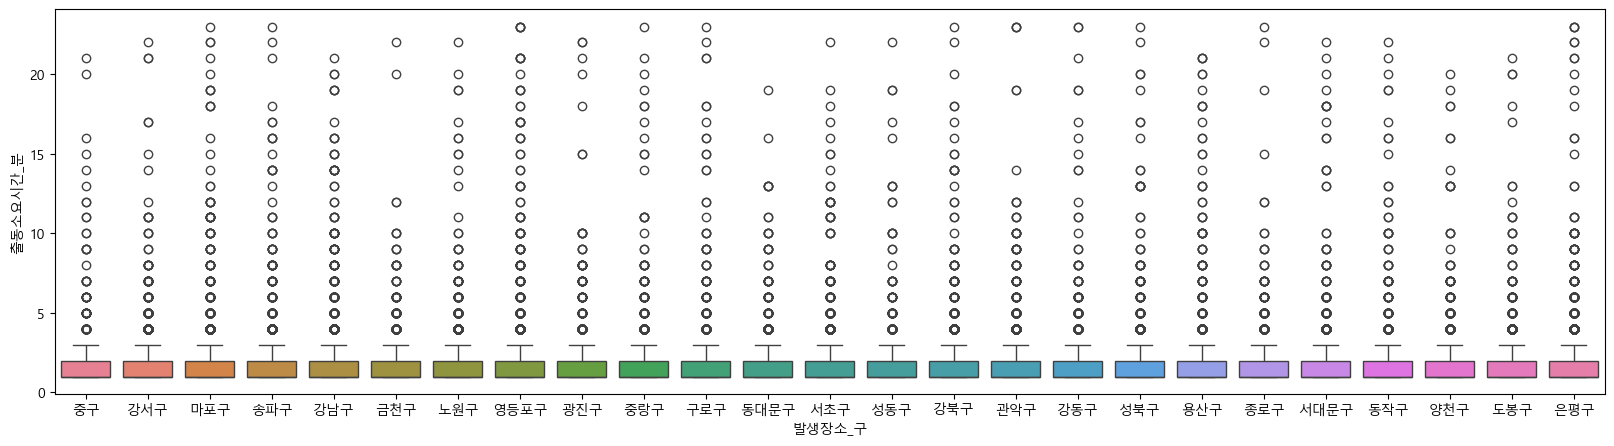

In [75]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_cleand, x='발생장소_구', y='출동소요시간_분', hue='발생장소_구')


In [76]:
df_cleand_pivot = df_cleand.pivot_table(index=['발생장소_구'], values='출동소요시간_분', aggfunc='mean').reset_index()
df_cleand_pivot

,발생장소_구,출동소요시간_분
0,강남구,1.73
1,강동구,1.75
2,강북구,1.82
3,강서구,1.73
4,관악구,1.80
5,광진구,1.77
6,구로구,1.74
7,금천구,1.74
8,노원구,1.85
9,도봉구,1.82


<AxesSubplot:xlabel='발생장소_구', ylabel='출동소요시간_분'>

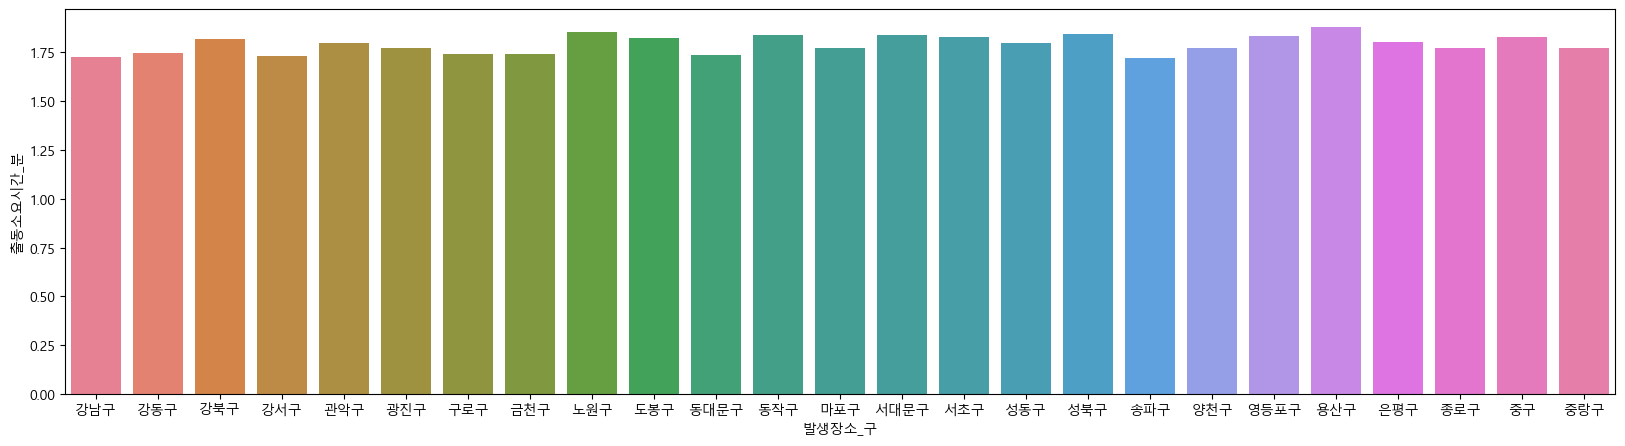

In [77]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleand_pivot, x='발생장소_구', y='출동소요시간_분', hue='발생장소_구')

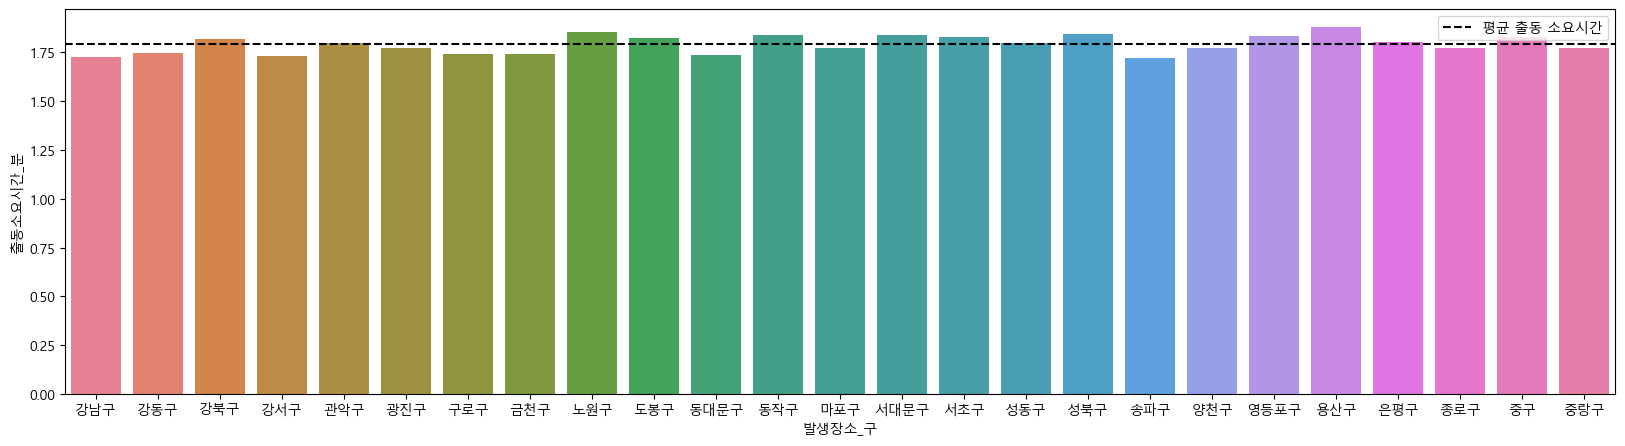

In [78]:
# 서울시 전체의 출동시간과 비교
mean_time = df_cleand_pivot['출동소요시간_분'].mean()

plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleand_pivot, x='발생장소_구', y='출동소요시간_분', hue='발생장소_구')

# mean_time을 선으로 추가
plt.axhline(mean_time, color='black', linestyle='--', label='평균 출동 소요시간')
plt.legend()

# 그래프 출력(그래프가 2개 이상일땐 이거 쓰는게 좋다)
plt.show()

# Folium

In [81]:
df_fire = pd.read_csv('서울시 서소위치 위치정보 (좌표계_ WGS1984).csv', encoding='cp949')
df_fire

,순번,서소코드,서소이름,위도,경도
0,1,77250,종암119안전센터,37.60,127.03
1,2,77280,성북119구조대,37.60,127.03
2,3,75251,청량리119안전센터,37.59,127.05
3,4,81254,개화119안전센터,37.57,126.80
4,5,92280,서대문119구조대,37.57,126.93
...,...,...,...,...,...
253,201,88254,운동장119안전센터,37.51,127.07
254,211,KK119,양주-백석119,37.80,126.99
255,220,77236,성북소방서,37.60,127.03
256,229,85253,구로119안전센터,37.49,126.88


In [83]:
# pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 108.4/108.4 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.3 kB ? eta -:--:--
   ---------------------------------------- 133.3/133.3 kB 8.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.9 kB ? eta -:--:--
   ---------------------------------------- 64.9/64.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   ---------------------------------------- 83.9/83.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/163.0 kB ? eta -:--:--
   ---------------------------------------- 163.0/163.0 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/99.6 kB ? eta -:--:--
   ---------------------------------------- 99.6/99.6 kB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/66.8 kB ? eta -:--:--
   ---------------------------------------- 66.

In [84]:
import folium
from folium.plugins import MarkerCluster

In [86]:
df_fire.iloc[0]  # 원하는 행을 인덱스를 통해 선택

순번              1
서소코드        77250
서소이름    종암119안전센터
위도          37.60
경도         127.03
Name: 0, dtype: object

In [87]:
center = df_fire.iloc[0]

# 지도를 생성
map = folium.Map(location=[center['위도'], center['경도']], zoom_start=13)  # zoom_start : 얼마나 확대된 상태인지

folium.Marker(
    location=[center['위도'], center['경도']],
    popup=center['서소이름']
).add_to(map)

# 지도 출력
map

In [88]:
# 여러개 그리기

center = df_fire.iloc[0]

map = folium.Map(location=[center['위도'], center['경도']], zoom_start=13)  # zoom_start : 얼마나 확대된 상태인지

# 모든 소방서 위치에 마커 추가
for _, row in df_fire.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['서소이름']
    ).add_to(map)

map

In [90]:
# 팝업창 조정

center = df_fire.iloc[0]

map = folium.Map(location=[center['위도'], center['경도']], zoom_start=13)  # zoom_start : 얼마나 확대된 상태인지

for _, row in df_fire.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(color='red', icon='info-sign'),
        popup=folium.Popup(f"<h3>{row['서소이름']}</h3>", max_width=300)
    ).add_to(map)

map